In [6]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
import numpy as np

cimage = imread('../sample_images/image9.jpg')

(-0.5, 1799.5, 1128.5, -0.5)

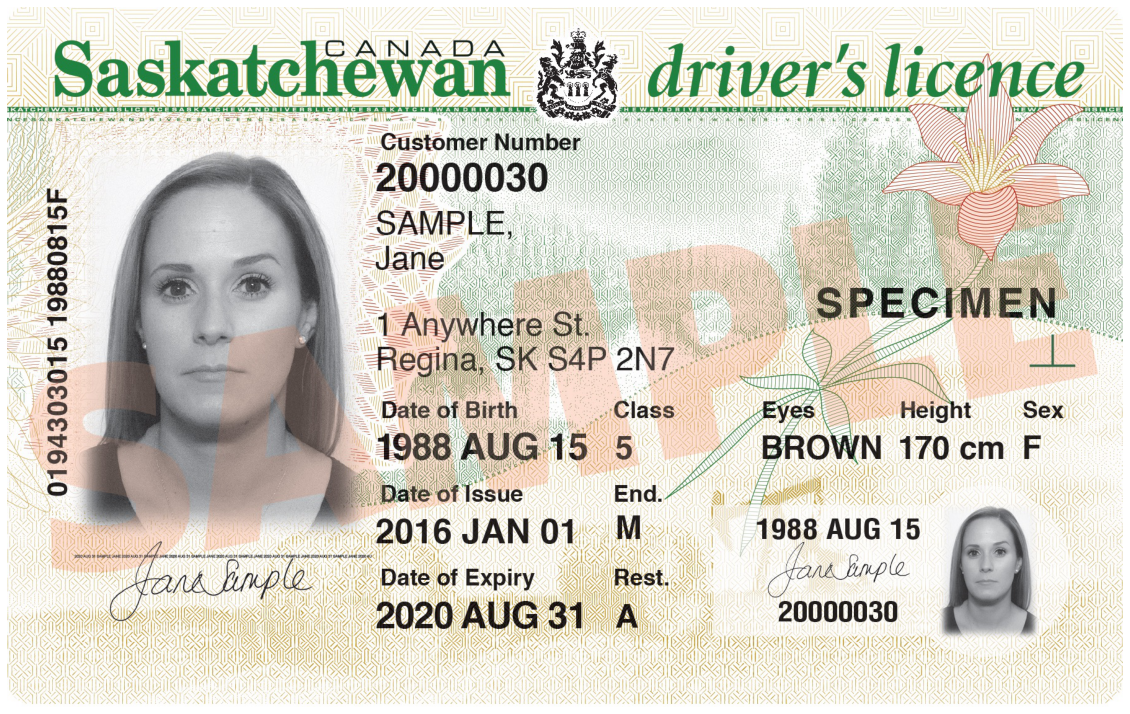

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cimage)
ax.axis('off')

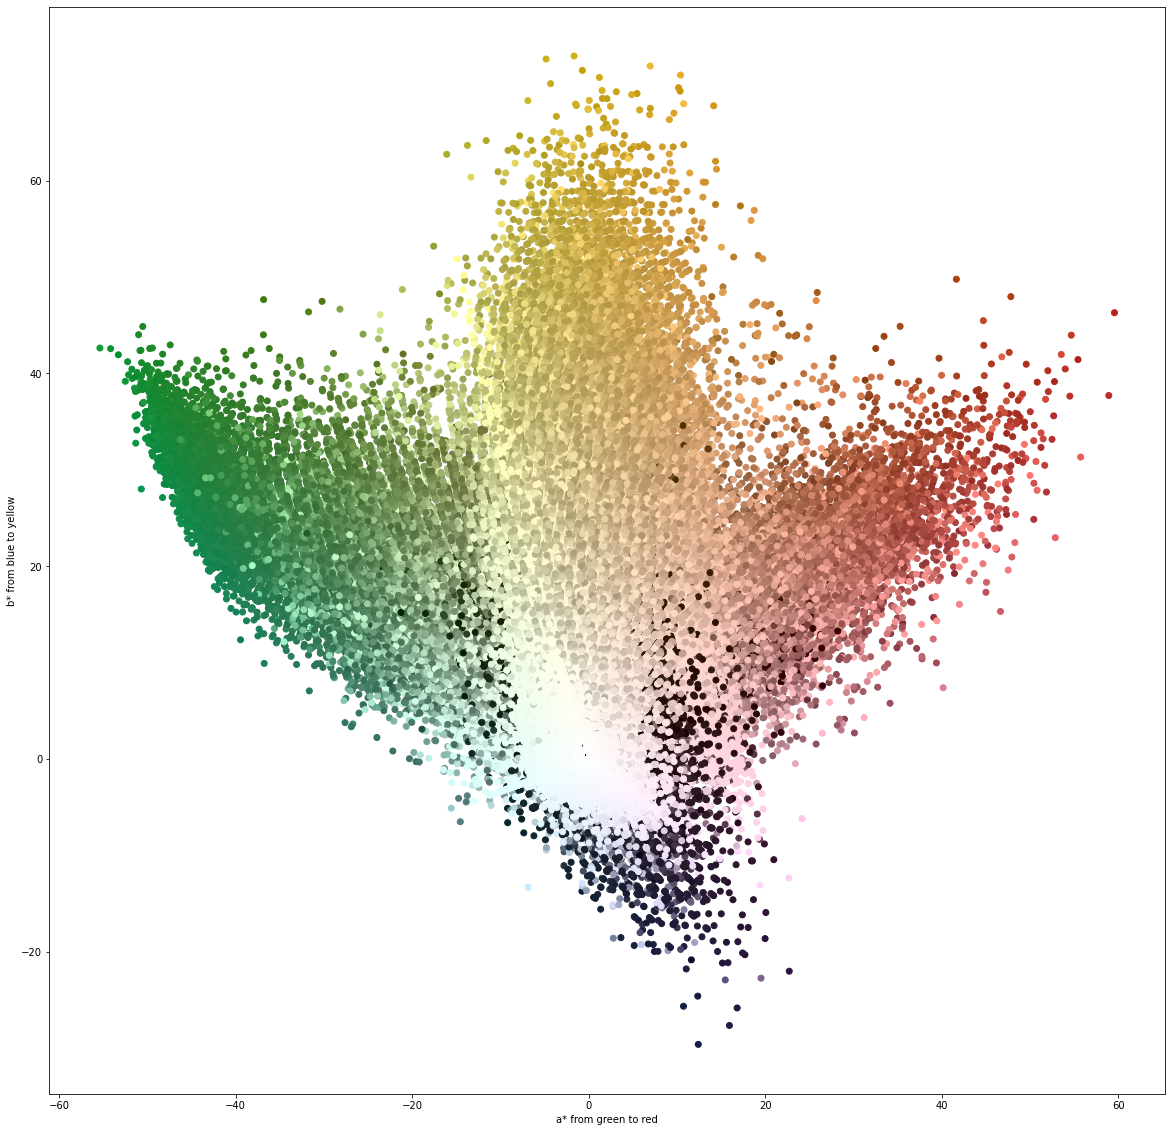

In [8]:
import matplotlib
from skimage import img_as_float

lab_img = color.rgb2lab(cimage)

x,y,z = lab_img.shape
to_plot = cimage.reshape(x*y, 3)
colors_map = to_plot.astype(np.float)/256
scatter_x = []
scatter_y = []
for xi in range(x):
    for yi in range(y):
        L_val = lab_img[xi,yi][0] 
        A_val = lab_img[xi,yi][1] 
        B_val = lab_img[xi,yi][2]
        scatter_x.append(A_val)
        scatter_y.append(B_val)
        
        
plt.figure(figsize=(20,20))
plt.xlabel("a* from green to red")
plt.ylabel("b* from blue to yellow")
plt.scatter(scatter_x,scatter_y, c=colors_map)

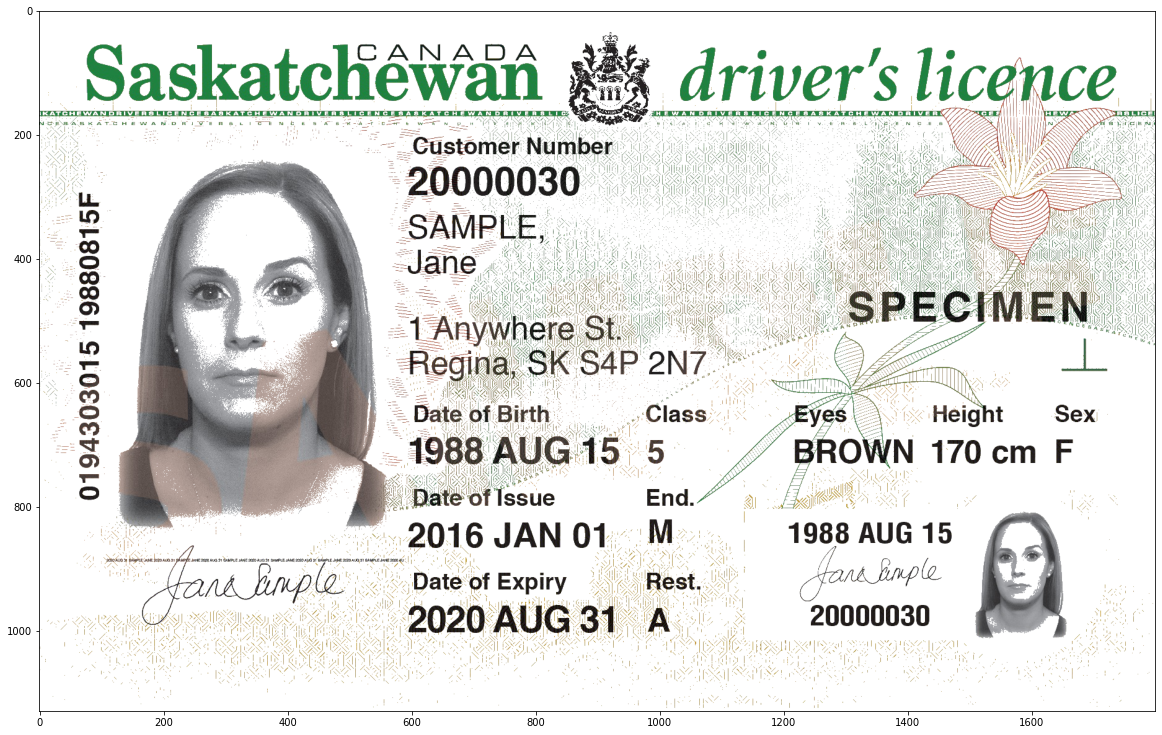

In [12]:
filtered_image = np.copy(cimage)
lab_img = color.rgb2lab(cimage)
x,y,z = lab_img.shape
A_val_min = -25
A_val_max = 25
B_val_min = -25
B_val_max = 25
for xi in range(x):
    for yi in range(y):
        L_val = lab_img[xi,yi][0] 
        A_val = lab_img[xi,yi][1] 
        B_val = lab_img[xi,yi][2]
        if L_val < 70:# and A_val > A_val_min and A_val < A_val_max and B_val > B_val_min and B_val < B_val_max:
            pass
        else:
            filtered_image[xi, yi] = [255,255,255]   
            
            
fig, ax = plt.subplots(figsize=(20,20))            
ax.imshow(filtered_image)
plt.show()

(-0.5, 1799.5, 1128.5, -0.5)

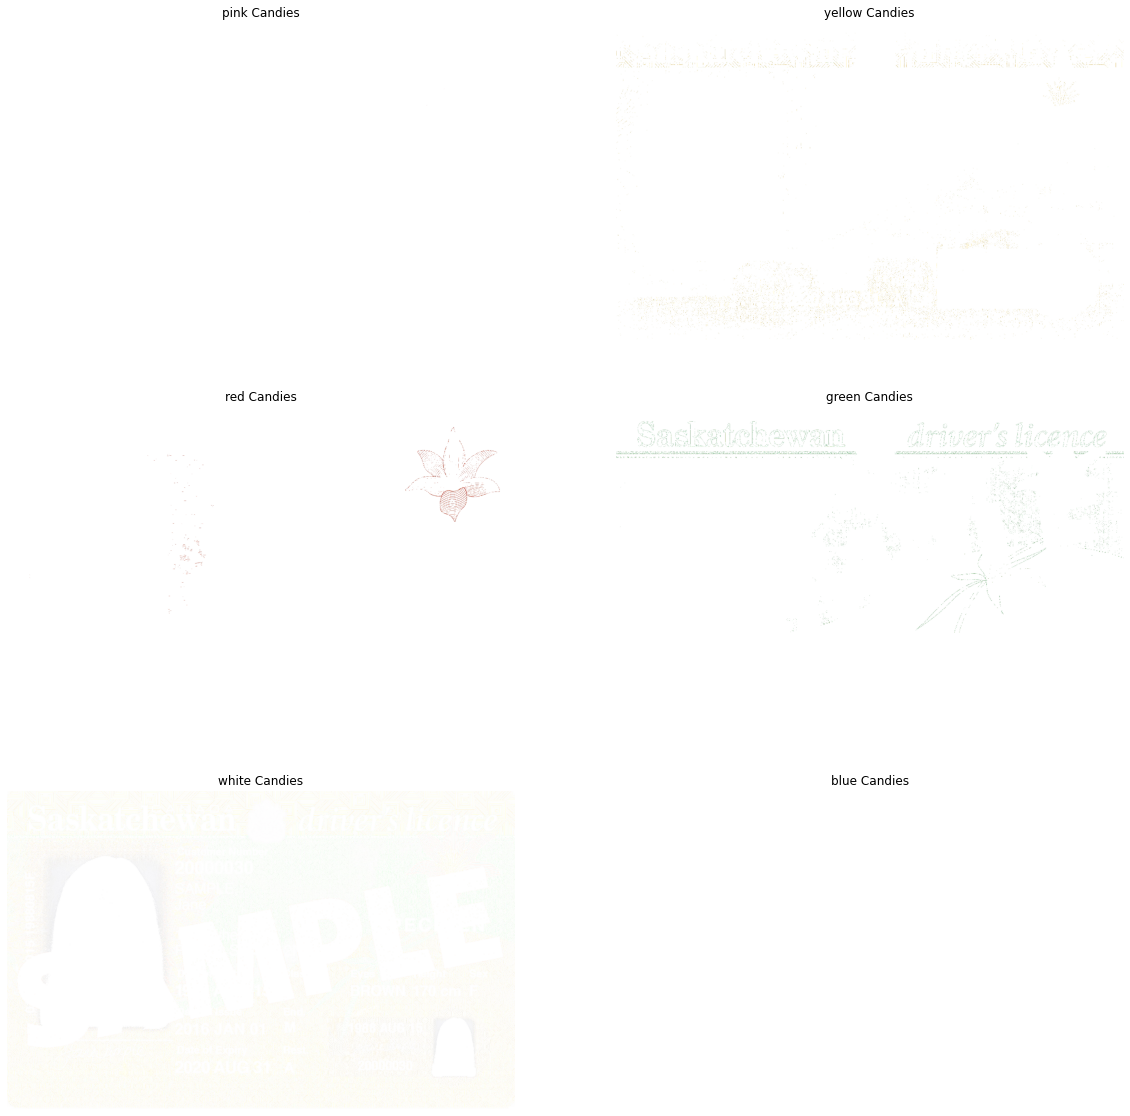

In [10]:
def filter_color(L_val_min, A_val_min, A_val_max, B_val_min, B_val_max):
    filtered_image = np.copy(cimage)
    for xi in range(x):
        for yi in range(y):
            L_val = lab_img[xi,yi][0] 
            A_val = lab_img[xi,yi][1] 
            B_val = lab_img[xi,yi][2]
            if L_val > L_val_min and A_val > A_val_min and A_val < A_val_max  and B_val > B_val_min and B_val < B_val_max:
                pass
            else:
                filtered_image[xi, yi] = [255,255,255]   
    return filtered_image

lab_img = color.rgb2lab(cimage)
yellow = filter_color(70, -50, 0, 30, 100)
red = filter_color(30, 25, 100, 0, 100)
green = filter_color(50, -128, -20, 0, 50)
blue = filter_color(50,-40, 30, -128, -20)
white = filter_color(93, -25, 25, -25, 25)
pink = filter_color(50, 20,128,-50,0)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
ax[0][0].imshow(pink)
ax[0][0].set_title("pink Candies")
ax[0][0].axis('off')

ax[0][1].imshow(yellow)
ax[0][1].set_title("yellow Candies")
ax[0][1].axis('off')

ax[1][0].imshow(red)
ax[1][0].set_title("red Candies")
ax[1][0].axis('off')

ax[1][1].imshow(green)
ax[1][1].set_title("green Candies")
ax[1][1].axis('off')

ax[2][0].imshow(white)
ax[2][0].set_title("white Candies")
ax[2][0].axis('off')

ax[2][1].imshow(blue)
ax[2][1].set_title("blue Candies")
ax[2][1].axis('off')

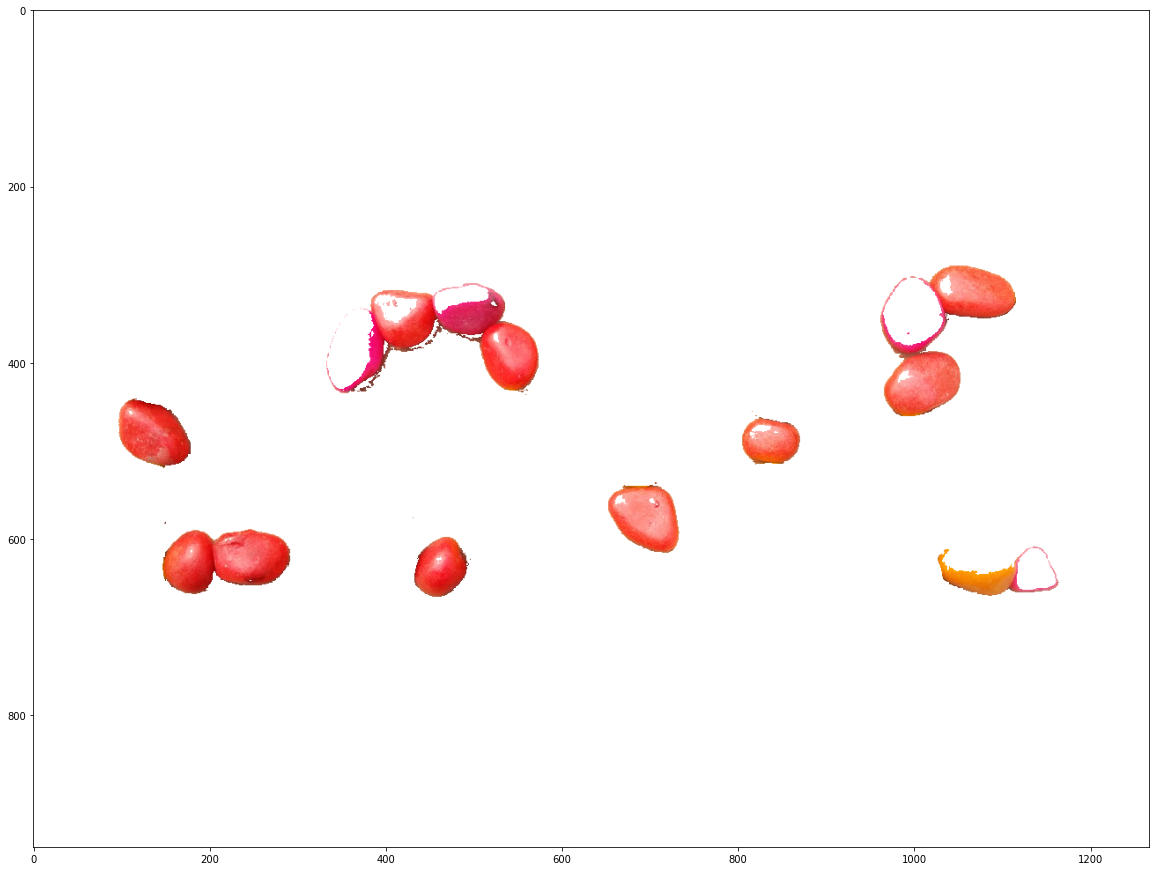

In [139]:
fig, ax = plt.subplots(figsize=(20,20))            
ax.imshow(filter_color(30, 25, 100, 0, 100))
plt.show()